# *Logistic Regression*
#### *The goal is to predict that the client has subscribed to a term deposit or not.*

In [26]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
bank_data=pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_data[bank_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [5]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank_data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank_data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
bank_data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [9]:
bank_data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [10]:
bank_data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [11]:
bank_data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [12]:
#converting categorical data into numerical
bank_data.replace({"job":{"blue-collar":0,"management":1,"technician":2,"admin.":3,"services":4,"retired":5,"self-employed":6,"entrepreneur":7,"unemployed":8,"housemaid":9,"student":10,"unknown":11 }},inplace=True)
bank_data.replace({"marital":{"married":0,"single":1,"divorced":2}},inplace=True)
bank_data.replace({"education":{"unknown":0,"primary":1,"secondary":2,"tertiary":3}},inplace=True)
bank_data.replace({"default":{"no":0,"yes":1}},inplace=True)
bank_data.replace({"housing":{"no":0,"yes":1}},inplace=True)
bank_data.replace({"loan":{"no":0,"yes":1}},inplace=True)
bank_data.replace({"y":{"no":0,"yes":1}},inplace=True)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,0,3,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,2,1,2,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,7,0,2,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,0,0,0,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,11,1,0,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,3,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,5,2,1,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,5,0,2,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,0,0,2,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


<AxesSubplot:title={'center':'Correlation'}>

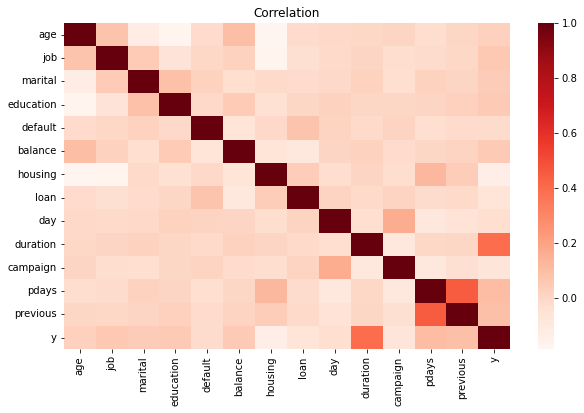

In [13]:
corr=bank_data.corr()
plt.figure(figsize=(10,6))
plt.title("Correlation")
sns.heatmap(corr,cmap="Reds")

In [14]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(14), object(3)
memory usage: 5.9+ MB


<font color=majenta>There are still categorical columns.We will use one hot encoding to solve this problem.</font>

In [15]:
bank_data=pd.get_dummies(bank_data,columns=['contact','poutcome','month'])
pd.set_option("display.max.columns", None)

In [16]:
bank_data

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1,0,3,0,2143,1,0,5,261,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,2,1,2,0,29,1,0,5,151,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,7,0,2,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,0,0,0,1506,1,0,5,92,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,11,1,0,0,1,0,0,5,198,1,-1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,3,0,825,0,0,17,977,3,-1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,5,2,1,0,1729,0,0,17,456,2,-1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,5,0,2,0,5715,0,0,17,1127,5,184,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,0,2,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


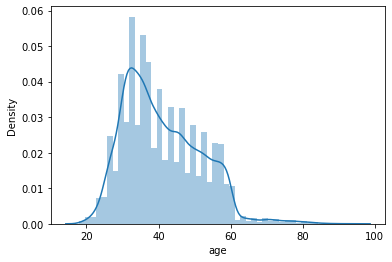

In [17]:
sns.distplot(bank_data['age']);

In [25]:
X=bank_data.drop(['y'],axis=1)
Y=bank_data['y']

In [27]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=4)

### Model Building

In [28]:
model=LogisticRegression()

In [29]:
model.fit(X_train,Y_train)

C:\Users\91775\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
trainp=model.predict(X_train)

In [40]:
accuracy = accuracy_score(trainp,Y_train)
print("The accuracy of model on training dataset is {}".format(accuracy))

The accuracy of model on training dataset is 0.8919210351692104


In [41]:
testp=model.predict(X_test)

In [59]:
accuracy_of_test_data = accuracy_score(Y_test,testp)
print("The accuracy of model on testing dataset is {}".format(accuracy_of_test_data ))

The accuracy of model on testing dataset is 0.8926241291606768


<font color=seagreen4>The model is performing good on both training as well as testing data,it does not cause overfitting or underfittig.</font>

## Model Validation

In [71]:
XP=model.predict(X)

### Confusion matrix

In [78]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,XP)
print(confusion_matrix)

[[39096   826]
 [ 4054  1235]]


In [81]:
((39096 + 1235)/(39096 +826+4054+1235))*100

89.20616664086174

### Roc Curve

Text(0, 0.5, 'True Positive Rate')

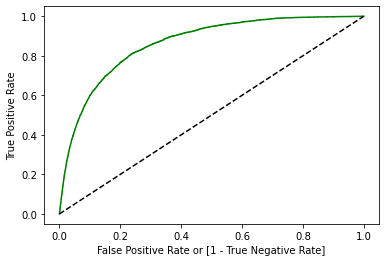

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(Y, XP)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='green', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [87]:
print(auc)

0.6064065758253173
